### 01. 분류 (Classification)의 개요

- 나이브 베이즈 (Naive Bayes) : 베이즈(Bayes) 통계와 생성 모델에 기반
- 로지스틱 회귀 (Logistic Regression) : 독립변수와 종속변수의 선형 관계성에 기반
- 결정 트리 (Decision Tree) : 데이터 균일도에 따른 규칙 기반
- 서포트 벡터 머신 (Support Vector Machine) : 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌
- 최소 근접 (Nearest Neighbor) : 근접 거리 기준
- 신경망 (Neural Network) : 심층 연결 기반
- 앙상블 (Ensemble) : 서로 다른 (또는 같은) 머신러닝 알고리즘 결합

-----
### 02. 결정 트리

- 결정 트리 (Decision Tree) : 학습을 통해 규칙을 자동으로 찾아내 트리(Tree) 기반의 분류 규칙 생성
    - *어떤 기준* 을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가!

- 깊이(depth)가 깊어질수록 결정 트리의 *예측 성능 저하* 가능성 높음

- 정보 균일도가 높은 데이터 셋을 먼저 선택할 수 있도록 규칙 조건 생성하여 서브 데이터셋 생성
- 균일도가 높은 자식 데이터 셋을 쪼개는 방식 반복하며 데이터 값 예측

- 정보 균일도 측정
    - 정보 이득 (Information Gain) : 엔트로피(데이터의 혼잡도) 개념 기반. 서로 다른 값이 섞여 있으면 엔트로피 ↑, 서로 같은 값이 섞여 있으면 엔트로피 ↓. 정보 이득 지수 = 1 - 엔트로피 지수. 결정 트리는 정보 이득 지수로 분할 기준을 정함. 즉, 정보 이득이 높은 속성을 기준으로 분할
    - 지니 계수 : 0이 가장 평등, 1로 갈수록 불평등. 머신러닝에 적용될 때에는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석함. 지니 계수가 낮은 속성을 기준으로 분할

#### 결정 트리 모델의 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') # 일치하는 경고를 인쇄하지 않음

In [2]:
## DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

In [4]:
## 붓꽃 데이터셋 로딩 및 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = .2, random_state = 11)

In [5]:
## DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [6]:
from sklearn.tree import export_graphviz

In [7]:
## export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)

In [8]:
import graphviz

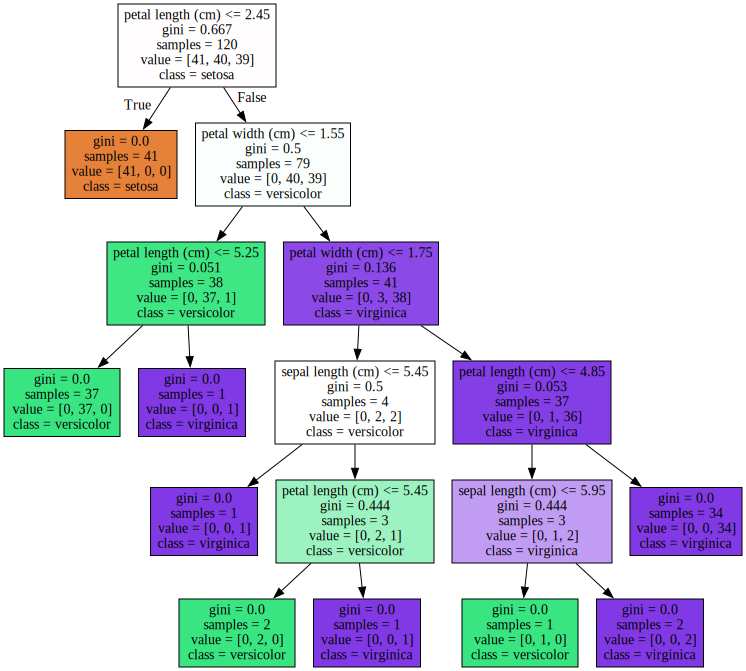

In [9]:
## 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화
with open("tree.dot") as f :
    dot_graph = f.read()

graphviz.Source(dot_graph)

- `max_depth` : 트리 깊이를 줄이면 더 간단한 결정 트리가 됨
- `min_samples_split` : 자식 규칙 노드를 분할해 만들기 위한 *최소한의 샘플 데이터 개수*. 예를 들어 `min_samples_split = 4`로 설정한다면, sample 수가 3개인 경우 더 이상 분할하지 않고 리프 노드가 됨.
- `min_samples_leaf` : 리프 노드가 될 수 있는 *샘플 데이터 건수의 최솟값*. 디폴트 값으로 1이고, 이는 단독 클래스이거나 단 한개의 데이터로 돼 있을 경우에 리프 노드가 될 수 있음. 값을 키우면 리프 노드가 될 수 있는 조건이 완화됨. 지니 계수가 크더라도 규칙이 변경되어 브랜치 노드가 줄어들고 결정 트리가 더 간결해짐.

In [10]:
import seaborn as sns
import numpy as np
%matplotlib inline

Feature importances : 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

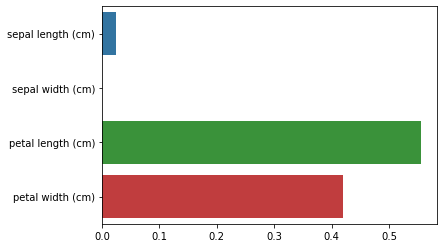

In [12]:
## feature importance 추출
print("Feature importances : \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

## feature별 importance mapping
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_) :
    print('{0} : {1:.3f}'.format(name, value))

## feature importance를 column 별로 시각화하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

#### 결정 트리 과적합 (Overfitting)

In [13]:
from sklearn.datasets import make_classification # 분류를 위한 테스트용 데이터 쉽게 생성
import matplotlib.pyplot as plt
%matplotlib inline

- `make_classification`
    - `n_features` : 독립 변수의 수
    - `n_redundant` : 독립 변수 중, 다른 독립 변수의 선형 조합으로 나타나는 성분의 수
    - `n_informative` : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수
    - `n_classes` : 종속 변수의 클래스 수
    - `n_clusters_per_class` : 클래스 당 클러스터의 수

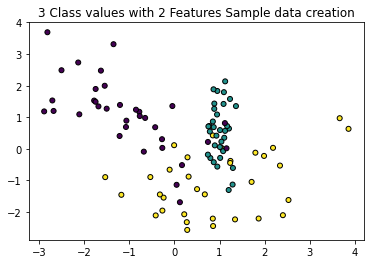

In [18]:
plt.title("3 Class values with 2 Features Sample data creation")

## 2차원 시각화를 위해서 피처는 2개, 클래느는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, n_classes = 3, n_clusters_per_class = 1, random_state = 0)

## 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s = 25, edgecolor = 'k')

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
            clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                        levels=np.arange(n_classes + 1) - 0.5,
                        cmap='rainbow', clim=(y.min(), y.max()),
                        zorder=1)

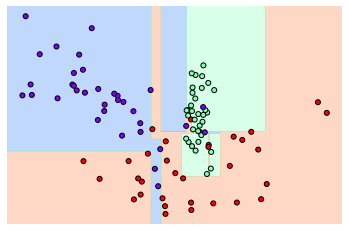

In [22]:
## 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

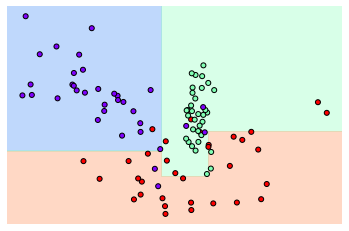

In [23]:
## 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6, random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

#### 결정 트리 실습 - 사용자 행동 인식 데이터 셋